## Importing Libraries & Data Load



In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

In [23]:
# Define the path to the Excel file
file_path = r"E:\Churn analysis project\prediction_Data.xlsx"

In [25]:
# Define the sheet name to read data from
sheet_name = 'vw_ChurnData'

In [27]:
# Read the data from the specified sheet into a pandas DataFrame
data = pd.read_excel(file_path, sheet_name=sheet_name)
# Display the first few rows of the fetched data
print(data.head())


  Customer_ID  Gender  Age Married        State  Number_of_Referrals  \
0   22841-TAM  Female   44     Yes   Tamil Nadu                   14   
1   22846-HAR  Female   68     Yes      Haryana                    4   
2   22847-GUJ  Female   84     Yes      Gujarat                   14   
3   22899-KAR    Male   37      No    Karnataka                   11   
4   22915-MAH  Female   41     Yes  Maharashtra                   10   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 9     Deal 1           Yes            Yes  ...   
1                21        NaN           Yes            Yes  ...   
2                23     Deal 1           Yes            Yes  ...   
3                14     Deal 5           Yes             No  ...   
4                23        NaN            No             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal     105.250000   7609.750000           0.0   
1  Bank Withdrawal      85.2

# Data Preprocessing

In [31]:
# Drop columns that won't be used for prediction
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

In [33]:
# List of columns to be label encoded
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]


In [35]:
# Encode categorical variables except the target variable
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [37]:
# Manually encode the target variable 'Customer_Status'
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})


In [39]:
# Split data into features and target
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']


In [41]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train Random Forest Model

In [46]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [48]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Evaluate Model

In [51]:
# Make predictions
y_pred = rf_model.predict(X_test)


In [53]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[811  46]
 [119 226]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       857
           1       0.83      0.66      0.73       345

    accuracy                           0.86      1202
   macro avg       0.85      0.80      0.82      1202
weighted avg       0.86      0.86      0.86      1202



In [55]:
# Feature Selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]


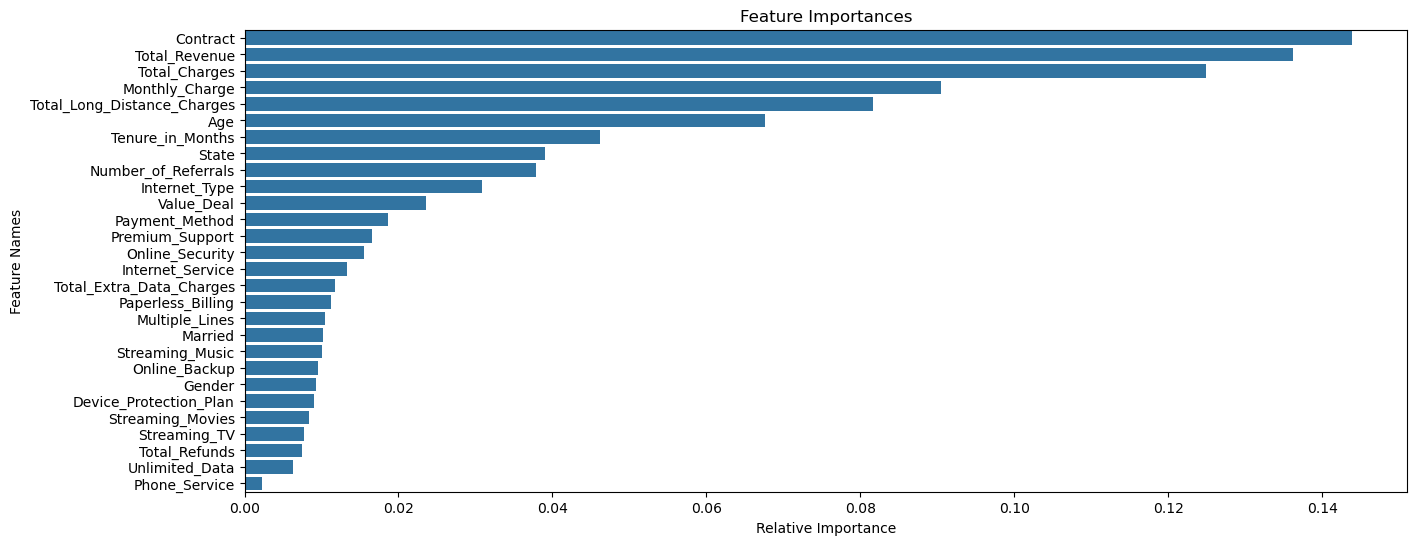

In [57]:
# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()


# Use Model for Prediction on New Data

In [60]:
# Define the path to the Joiner Data Excel file
file_path = r"E:\Churn analysis project\prediction_Data.xlsx"


In [62]:
# Define the sheet name to read data from
sheet_name = 'vw_JoinData'

In [64]:
# Read the data from the specified sheet into a pandas DataFrame
new_data = pd.read_excel(file_path, sheet_name=sheet_name)

In [66]:
# Display the first few rows of the fetched data
print(new_data.head())

  Customer_ID  Gender  Age Married          State  Number_of_Referrals  \
0   23078-UTT  Female   57     Yes  Uttar Pradesh                    3   
1   23148-CHH  Female   74     Yes   Chhattisgarh                    4   
2   23256-HAR  Female   32     Yes        Haryana                   10   
3   23605-MAH  Female   31     Yes    Maharashtra                    1   
4   23632-HAR  Female   37     Yes        Haryana                    2   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                24        NaN           Yes             No  ...   
1                 9     Deal 5           Yes             No  ...   
2                31     Deal 5           Yes             No  ...   
3                19        NaN           Yes             No  ...   
4                16     Deal 5           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal      20.299999     20.299999           0.0   
1  Bank Withdraw

In [68]:
# Retain the original DataFrame to preserve unencoded columns
original_data = new_data.copy()


In [70]:
# Retain the Customer_ID column
customer_ids = new_data['Customer_ID']

In [72]:
# Drop columns that won't be used for prediction in the encoded DataFrame
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

In [74]:
# Encode categorical variables using the saved label encoders
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])


In [76]:
# Make predictions
new_predictions = rf_model.predict(new_data)


In [78]:
# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

In [80]:
# Filter the DataFrame to include only records predicted as "Churned"
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

In [ ]:
# Save the results
original_data.to_csv(r"E:\Churn analysis project\Predictions.csv", index=False)